<a href="https://colab.research.google.com/github/dev-EthanJ/scikit-learn_Machine_Learning/blob/main/20221110_scikit-learn_ML_NB_Kor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# scikit-learn Machine Learning Naive Bayes Kor NLP <br>사이킷런 머신러닝 나이브베이즈 한글 자연어처리

In [1]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 1. 데이터 불러오기 (Data Collection)


In [2]:
# https://github.com/e9t/nsmc/

file_url = 'https://raw.githubusercontent.com/dev-EthanJ/scikit-learn_Machine_Learning/main/data/ratings.txt'
df = pd.read_csv(file_url, sep='\t', index_col=0)

df.head()

,document,label
id,,
8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
8132799,"디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산...",1
4655635,폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.,1
9251303,와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런...,1
10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200000 entries, 8112052 to 8548411
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   document  199992 non-null  object
 1   label     200000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 4.6+ MB


In [4]:
df[df.document.isnull()]

,document,label
id,,
6369843,NaN,1
511097,NaN,1
2172111,NaN,1
402110,NaN,1
5942978,NaN,0
5026896,NaN,0
1034280,NaN,0
1034283,NaN,0


- 총 데이터 갯수에 비해 적은 missing value → drop

In [5]:
df = df.dropna()

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199992 entries, 8112052 to 8548411
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   document  199992 non-null  object
 1   label     199992 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 4.6+ MB


In [6]:
sample = pd.concat([df.head(1000), df.tail(1000)])

sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 8112052 to 8548411
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   document  2000 non-null   object
 1   label     2000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 46.9+ KB


In [7]:
sample.head(10)

,document,label
id,,
8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
8132799,"디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산...",1
4655635,폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.,1
9251303,와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런...,1
10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.,1
2190435,사랑을 해본사람이라면 처음부터 끝까지 웃을수 있는영화,1
9279041,완전 감동입니다 다시봐도 감동,1
7865729,개들의 전쟁2 나오나요? 나오면 1빠로 보고 싶음,1
7477618,굿,1


## 2. 데이터 전처리 (Data pre-processing)

In [8]:
sample_text = sample.document.iloc[0]

sample_text

'어릴때보고 지금다시봐도 재밌어요ㅋㅋ'

In [9]:
# https://konlpy.org/ko/latest/index.html

!pip install konlpy --quiet
# 단어 품사, 형태소 태깅 가능

In [10]:
from konlpy.tag import Okt

okt = Okt()

print(sample_text)
# 명사(noun)만 남기기
print(okt.nouns(sample_text))

어릴때보고 지금다시봐도 재밌어요ㅋㅋ
['때', '보고', '지금', '다시']


In [11]:
# 두 글자 이상의 단어
sample['nouns'] = sample.document.apply(okt.nouns).apply(
    lambda nouns: [n for n in nouns if len(n) >= 2])

sample['nouns']

id
8112052                                          [보고, 지금, 다시]
8132799     [디자인, 학생, 외국, 디자이너, 일군, 전통, 통해, 발전, 문화, 산업, 사실...
4655635                             [폴리스스토리, 시리즈, 부터, 하나, 최고]
9251303                              [연기, 진짜, 생각, 몰입, 진짜, 영화]
10067386                                   [안개, 밤하늘, 초승달, 영화]
                                  ...                        
8963373                                             [포켓, 몬스터]
3302770                                                    []
5458175                       [완전, 사이코, 영화, 마지막, 더욱더, 영화, 린다]
6908648                                       [라따뚜이, 스머프, 런가]
8548411                                      [저그, 영차, 영차, 영차]
Name: nouns, Length: 2000, dtype: object

In [12]:
sample.head()

,document,label,nouns
id,,,
8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1,"[보고, 지금, 다시]"
8132799,"디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산...",1,"[디자인, 학생, 외국, 디자이너, 일군, 전통, 통해, 발전, 문화, 산업, 사실..."
4655635,폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.,1,"[폴리스스토리, 시리즈, 부터, 하나, 최고]"
9251303,와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런...,1,"[연기, 진짜, 생각, 몰입, 진짜, 영화]"
10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.,1,"[안개, 밤하늘, 초승달, 영화]"


In [13]:
df = sample.copy()

## 3. 모델 학습 (Training Model)

In [14]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()

joined_nouns = df.nouns.apply(" ".join)

cv.fit(joined_nouns)
cv.vocabulary_

{'보고': 1206,
 '지금': 2670,
 '다시': 551,
 '디자인': 722,
 '학생': 3120,
 '외국': 2059,
 '디자이너': 721,
 '일군': 2309,
 '전통': 2479,
 '통해': 2972,
 '발전': 1119,
 '문화': 1011,
 '산업': 1363,
 '사실': 1345,
 '우리나라': 2090,
 '시절': 1640,
 '열정': 1964,
 '노라노': 494,
 '사람': 1333,
 '폴리스스토리': 3067,
 '시리즈': 1628,
 '부터': 1266,
 '하나': 3098,
 '최고': 2814,
 '연기': 1945,
 '진짜': 2711,
 '생각': 1404,
 '몰입': 964,
 '영화': 1977,
 '안개': 1770,
 '밤하늘': 1124,
 '초승달': 2806,
 '사랑': 1336,
 '라면': 747,
 '처음': 2772,
 '완전': 2044,
 '감동': 52,
 '전쟁': 2475,
 '바보': 1067,
 '나이': 430,
 '훗날': 3280,
 '사하나': 1360,
 '감정': 62,
 '이해': 2273,
 '고질': 199,
 '오페라': 2024,
 '작품': 2381,
 '극단': 323,
 '갈림': 42,
 '반전': 1105,
 '평점': 3046,
 '긴장감': 374,
 '스릴': 1574,
 '전장': 2474,
 '공포': 219,
 '고시': 189,
 '소재': 1512,
 '관련': 236,
 '단연': 565,
 '가면': 10,
 '갈수록': 44,
 '더욱': 624,
 '밀회': 1061,
 '화이팅': 3243,
 '수작': 1549,
 '일본': 2315,
 '마음': 840,
 '임팩트': 2342,
 '일품': 2334,
 '제대로': 2541,
 '범죄': 1174,
 '스릴러': 1575,
 '마디': 827,
 '징텅': 2728,
 '교복': 249,
 '이의': 2256,
 '볼펜': 1241,
 '자국':

In [15]:
x = cv.transform(joined_nouns)

print(x)

  (0, 551)	1
  (0, 1206)	1
  (0, 2670)	1
  (1, 494)	1
  (1, 721)	1
  (1, 722)	1
  (1, 1011)	1
  (1, 1119)	1
  (1, 1333)	1
  (1, 1345)	1
  (1, 1363)	1
  (1, 1640)	1
  (1, 1964)	1
  (1, 2059)	1
  (1, 2090)	1
  (1, 2309)	1
  (1, 2479)	2
  (1, 2972)	1
  (1, 3120)	1
  (2, 1266)	1
  (2, 1628)	1
  (2, 2814)	1
  (2, 3067)	1
  (2, 3098)	1
  (3, 964)	1
  :	:
  (1990, 2499)	1
  (1990, 2892)	1
  (1990, 3046)	1
  (1991, 67)	1
  (1991, 435)	1
  (1991, 1957)	1
  (1991, 1977)	1
  (1991, 2347)	1
  (1992, 2947)	1
  (1993, 1990)	1
  (1994, 102)	1
  (1994, 1202)	1
  (1995, 963)	1
  (1995, 3057)	1
  (1997, 625)	1
  (1997, 819)	1
  (1997, 847)	1
  (1997, 1353)	1
  (1997, 1977)	2
  (1997, 2044)	1
  (1998, 746)	1
  (1998, 766)	1
  (1998, 1578)	1
  (1999, 1976)	3
  (1999, 2447)	1


In [16]:
from sklearn.model_selection import train_test_split

y = df.label
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size = 0.2, random_state = 814)

In [17]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()

model.fit(x_train, y_train)
pred = model.predict(x_test)

## 4. 모델 평가 (Evaluating Model)

In [18]:
from sklearn.metrics import accuracy_score, confusion_matrix

accuracy_score(y_test, pred)

0.69

In [19]:
cf_mtx = confusion_matrix(y_test, pred)

cf_mtx

array([[123,  78],
       [ 46, 153]])

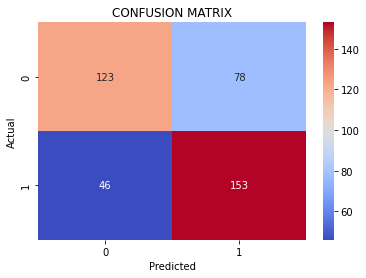

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(cf_mtx, cmap='coolwarm', annot=True, fmt='.0f')
plt.title("CONFUSION MATRIX")
plt.ylabel('Actual')
plt.xlabel('Predicted')

plt.show()

## Mecab

In [21]:
!curl -s https://raw.githubusercontent.com/teddylee777/machine-learning/master/99-Misc/01-Colab/mecab-colab.sh | bash

--2022-11-16 05:30:26--  https://www.dropbox.com/s/9xls0tgtf3edgns/mecab-0.996-ko-0.9.2.tar.gz?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.71.18, 2620:100:6021:18::a27d:4112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.71.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/dl/9xls0tgtf3edgns/mecab-0.996-ko-0.9.2.tar.gz [following]
--2022-11-16 05:30:26--  https://www.dropbox.com/s/dl/9xls0tgtf3edgns/mecab-0.996-ko-0.9.2.tar.gz
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc63ee86bb2fecd692b2666d2769.dl.dropboxusercontent.com/cd/0/get/Bw29JOIWcbnO6vIrxoQTy5re9QtCtzgv1UhjxQzauedYRrScZ7R_gQ_GkkyAyIwDA2tO8jB5uNB3PwFD2cV53UliOK9o2N6ndkU8rX4K6aWmTSFuTjbcKXMN2op9ODK2lwwbTOddv6IHFVvAx2l_9p1U3qJFPRltodNP_erATEZioqJe0c1KSBk_l7zJoN0BaOs/file?dl=1# [following]
--2022-11-16 05:30:27--  https://uc63ee86bb2fecd692b2666d2769.dl.dropboxusercontent.com/cd/0/get/Bw29JOIWc

In [22]:
from konlpy.tag import Mecab

mecab = Mecab()

df = pd.read_csv(file_url, sep='\t', index_col=0)
df.head()

,document,label
id,,
8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
8132799,"디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산...",1
4655635,폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.,1
9251303,와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런...,1
10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.,1


In [23]:
df = df.dropna()
df = pd.concat([df.head(1000), df.tail(1000)])

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 8112052 to 8548411
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   document  2000 non-null   object
 1   label     2000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 46.9+ KB


0.62


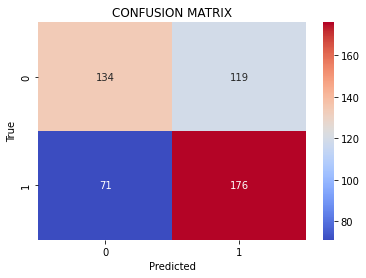

In [24]:
def handle_naive_bayes(df: pd.DataFrame, tagger):
    nouns = df.document.apply(tagger).apply(" ".join)
    cv = CountVectorizer()
    x = cv.fit_transform(nouns)
    y = df.label
    x_train, x_test, y_train, y_test = train_test_split(x, y)
    model = MultinomialNB()
    model.fit(x_train, y_train)
    pred = model.predict(x_test)
    print(accuracy_score(y_test, pred))
    sns.heatmap(confusion_matrix(y_test, pred),
                cmap='coolwarm', annot=True, fmt='.0f')
    plt.title("CONFUSION MATRIX")
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

handle_naive_bayes(df, mecab.nouns)